### Objetivo

Criar visualizações gráficas

In [9]:
#import modules
import os
import pandas as pd
import datetime as dt
import time as t

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import plot


Criar variaveis de caminho para os arquivos data

In [ ]:
# Caminho do arquivo atual
path_notebook = os.getcwd()

# Caminho da pasta pai
path_parent = os.path.dirname(path_notebook)

# Caminho para pasta "data" de banco de dados
data_path = os.path.join(path_parent, "data")

Criar gráfico de linha do bitcoin

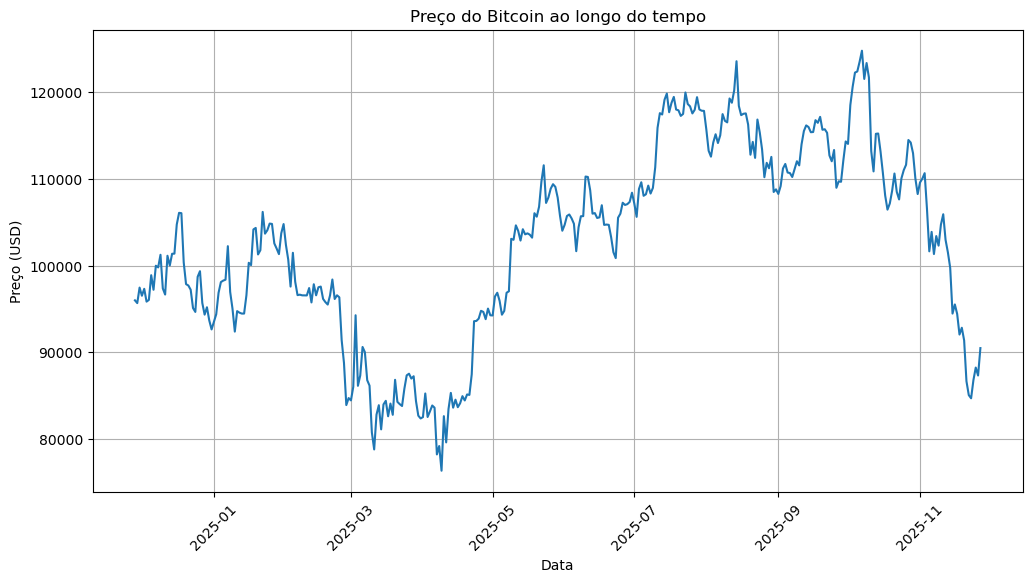

In [10]:
# Caminho completo do arquivo
file_path = os.path.join(data_path, "bitcoin.csv")

# Ler o CSV
df = pd.read_csv(file_path)

# Converter a coluna date para datetime (importante!)
df["date"] = pd.to_datetime(df["date"])

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["price"])

plt.title("Preço do Bitcoin ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

Criar gráfico interartivo com plotly

In [ ]:
# Diretório das figuras
figures_path = os.path.join(path_parent, "data", "figures")
os.makedirs(figures_path, exist_ok=True)   # garante que a pasta existe

df = pd.read_csv(file_path)

# Criar gráfico de linha
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df["date"],
        y=df["price"],
        mode="lines",
        name="Bitcoin Price"
    )
)

# Layout
fig.update_layout(
    title="Preço do Bitcoin ao longo do tempo",
    xaxis_title="Data",
    yaxis_title="Preço (USD)",
    template="plotly_white",
    autosize=True
)

# --- Salvar como HTML ---
output_file = os.path.join(figures_path, "bitcoin.html")
fig.write_html(output_file, include_plotlyjs="cdn")

print(f"Arquivo salvo em: {output_file}")



Arquivo salvo em: c:\Users\Mateus\Documents\MateusYamaguti\PROJETO-criptocurrency-analysis\data\figures\bitcoin.html


Criar gráficos interativos para todas as criptomoedas

In [22]:
# Local de armazenamento das figuras
figures_path = os.path.join(path_parent, "data", "figures")

# Ler lista de criptomedas
name_criptomoedas = pd.read_csv(os.path.join(data_path, "id_listname_dataframe.csv"))
name_criptomoedas = name_criptomoedas["name"]
print(name_criptomoedas)



for item in name_criptomoedas:
    
    # Criar nome padronizado para armazenamento
    default_name = str(item.replace(" ", "_")+".csv")
    df = pd.read_csv(file_path)

    # Criar gráfico de linha
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=df["date"],
            y=df["price"],
            mode="lines",
            name=item
        )
    )

    # Layout
    fig.update_layout(
        title=f"Preço do {item} ao longo do tempo",
        xaxis_title="Data",
        yaxis_title="Preço (USD)",
        template="plotly_white",
        autosize=True
    )

    # --- Salvar como HTML ---
    output_file = os.path.join(figures_path, f"{default_name}.html")
    fig.write_html(output_file, include_plotlyjs="cdn")


0           ZB (Derivatives) PEOPLE
1                     CME Group BTC
2                            EOSPFC
3            ZB (Derivatives) MATIC
4              Bibox (Futures) LUNC
                    ...            
31211            KCEX (Futures) BIO
31212    KCEX (Futures) BROCCOLIF2B
31213             KCEX (Futures) NC
31214          WOO X (Futures) HUMA
31215             WOO X (Futures) W
Name: name, Length: 31216, dtype: object


OSError: [Errno 22] Invalid argument: 'c:\\Users\\Mateus\\Documents\\MateusYamaguti\\PROJETO-criptocurrency-analysis\\data\\figures\\MCS_{"VALUE"=>"DOT"}.csv.html'